# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [45]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [46]:
def readFile():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
   
    return df

def DfAfter():
    df=readFile()
    After=df.copy()
    After=After[After["Date"]> "2015"]
    return After
After=DfAfter()
After.head()

def DfBefore():
    df=readFile()
    Before=df.copy()
    Before=Before[Before["Date"]< "2015"]
    return Before
Before=DfBefore()
Before.head()
    

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [47]:
def giveMax(df):
    
    Max_=df.copy()
    Max_=Max_[Max_['Element']=='TMAX']
    Max_=Max_.drop(['ID','Element'],axis=1)
    Max_=Max_.sort_values("Date")
    Max_['Date']=Max_.Date.str[5:]
    Max_= Max_[Max_['Date'] != '02-29']
    ##############
    #Max_= Max_[Max_['Date'] < '12-15']
    ##################
    #print(Max_.head())
    MaxGroup=Max_.groupby('Date').agg(max)
    #MaxGroup=MaxGroup.sort_values("Date")
    return MaxGroup.reset_index()
Massimo=giveMax(Before)
print(Massimo.tail(10))

      Date  Data_Value
355  12-22         133
356  12-23         133
357  12-24         139
358  12-25         100
359  12-26         106
360  12-27         189
361  12-28         194
362  12-29         128
363  12-30         117
364  12-31         139


In [48]:
def giveMin(df):
    min_=df.copy()
    min_=min_[min_['Element']=='TMIN']
    min_=min_.drop(['ID','Element'],axis=1)
    min_['Date']=min_.Date.str[5:]
    min_= min_[min_['Date'] != '02-29']
    ####################
    #min_= min_[min_['Date'] < '12-15']
    ###############
    min_=min_.sort_values("Date")
    MinGroup=min_.groupby('Date').agg(min)
    return MinGroup.reset_index()

Minimo=giveMin(Before)
print(Minimo.tail(10))

      Date  Data_Value
355  12-22        -200
356  12-23        -200
357  12-24        -167
358  12-25        -167
359  12-26        -156
360  12-27        -138
361  12-28        -166
362  12-29        -150
363  12-30        -144
364  12-31        -150


In [49]:
def ExtremMinimo():
    Minimo2015=giveMin(After)
    Minimo=giveMin(Before)
    #Minimo2015['Date']='2015-'+Minimo2015['Date']
    Minimo2015.columns=['Date','Temp_2015']
    Minimo.columns=['Date','Temp_Before']
    Minumus=Minimo.merge(Minimo2015,on='Date')
    Minumus['flag']=0
    Minumus.flag[Minumus['Temp_Before']>Minumus['Temp_2015']]=1
    Minumus=Minumus[Minumus['flag']==1]
    Minumus=Minumus[['Date','Temp_2015']]
    Minumus['Date']='2015-'+Minumus['Date']
    return Minumus


In [50]:
def ExtremMax():
    Massimo2015=giveMax(After)
    Massimo=giveMax(Before)
    #Minimo2015['Date']='2015-'+Minimo2015['Date']
    Massimo2015.columns=['Date','Temp_2015']
    Massimo.columns=['Date','Temp_Before']
    Masimus=Massimo.merge(Massimo2015,on='Date')
    Masimus['flag']=0
    Masimus.flag[Masimus['Temp_Before']<Masimus['Temp_2015']]=1
    Masimus=Masimus[Masimus['flag']==1]
    Masimus=Masimus[['Date','Temp_2015']]
    Masimus['Date']='2015-'+Masimus['Date']
    return Masimus
Masimus=ExtremMax()
Masimus.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Temp_2015
39,2015-02-09,83
106,2015-04-17,278
126,2015-05-07,306
127,2015-05-08,333
130,2015-05-11,306


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


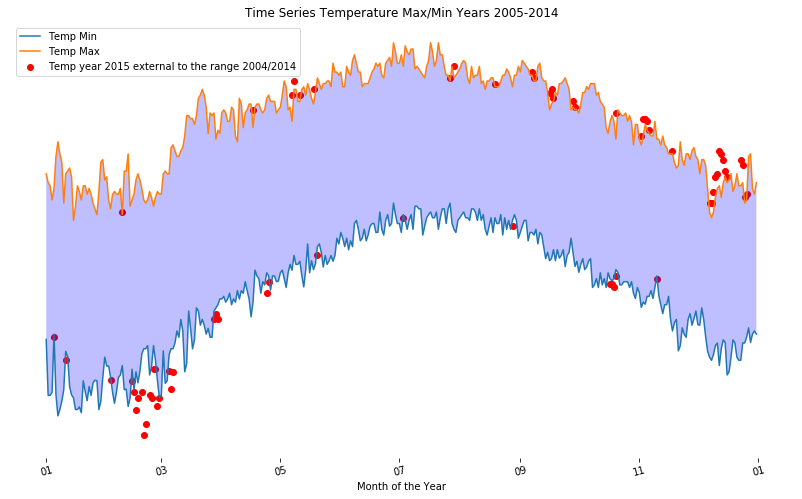

In [51]:
from matplotlib.dates import DateFormatter
from matplotlib.artist import Artist
from matplotlib import dates
import datetime
hfmt = dates.DateFormatter('%m')

plt.figure(figsize=(14,8))
# plot the linear data and the exponential data
Minimo=giveMin(Before)
Minimo['Date']='2015-'+Minimo['Date']

#print(Minimo.head)
observationMin_dates = list(map(pd.to_datetime, Minimo.Date))
#print(observationMin_dates)
plt.plot(observationMin_dates,Minimo.Data_Value, '-',observationMin_dates,Massimo.Data_Value, '-')
###############################
# Minimum Scatter
Minumus=ExtremMinimo()
obsDate=list(map(pd.to_datetime, Minumus.Date))
#plt.figure()
plt.scatter(obsDate, Minumus.Temp_2015,c='red')
###########################
###############################
# Minimum Scatter
Masimus=ExtremMax()
obsDate=list(map(pd.to_datetime, Masimus.Date))
plt.scatter(obsDate, Masimus.Temp_2015,c='red')
###########################


plt.xlabel('Month of the Year')
#plt.axis.
#.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.ylabel('')
plt.title('Time Series Temperature Max/Min Years 2005-2014')

#plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
#plt.legend(['Min','Max'])


plt.fill_between(observationMin_dates, 
                       Minimo.Data_Value,Massimo.Data_Value,
                       facecolor='blue', 
                       alpha=0.25)
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(15)
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
    
plt.legend(['Temp Min','Temp Max', 'Temp year 2015 external to the range 2004/2014'])
plt.show()
